<a href="https://colab.research.google.com/github/thedenaas/jub_ml/blob/main/fall_2022/lecture_4/assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.neighbors import KDTree
from sklearn.datasets import make_blobs, make_circles, load_iris
from sklearn.metrics import pairwise_distances
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import copy
import cv2
from collections import deque
from collections import defaultdict
import sys

In [2]:
def visualize_clasters(X, labels):
    unique_labels = np.unique(labels)
    unique_colors = np.random.random((len(unique_labels), 3))
    colors = [unique_colors[l] for l in labels]
    plt.figure(figsize=(9, 9))
    plt.scatter(X[:, 0], X[:, 1], c=colors)
    plt.show()

Generate data fot the tasks

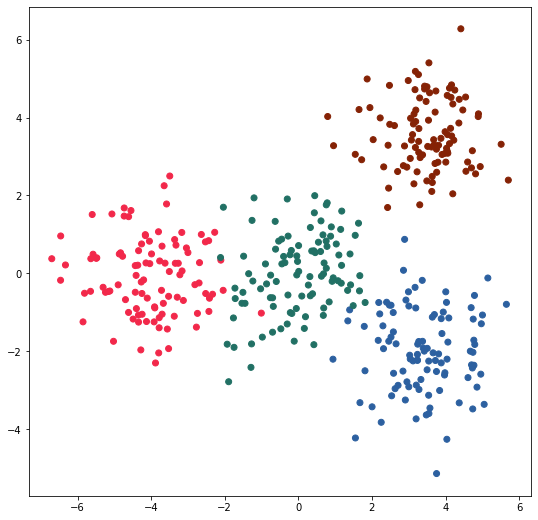

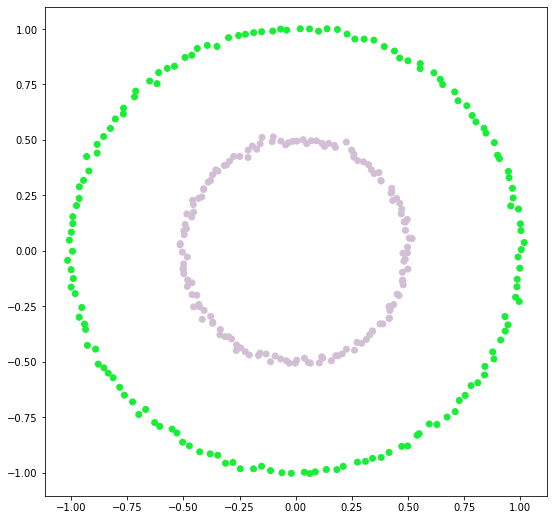

In [3]:
X_1, true_labels = make_blobs(400, 2, centers=[[0, 0], [-4, 0], [3.5, 3.5], [3.5, -2.0]])
visualize_clasters(X_1, true_labels)
X_2, true_labels = make_circles(n_samples=300, noise=0.01, factor=0.5)
visualize_clasters(X_2, true_labels)

X_iris = load_iris().data

### **Task 1. k-Means [20 pts]**
Implement k-means

#### initialization
* n_clusters - number of clusters
* init - how centers of the clusters are selected
    1. `random` - clusters' centroids are chosen at random
    2. `sample` - clusters' centroids are chosen at random from the given data

#### functionality
* `fit(X, y=None)` - initialize `self.centroids`, perform search for the best `self.centroids` values of clusters on the given data X (y is ignored)
* `predict(X)` - for each point in `X` returns number of the predicted cluster



__Don't forget to re-initialize empty cluster during the training for better convergence!__

In [ ]:
class KMeans:
    def __init__(self, n_clusters, init="random", max_iter=300):
        self.k = n_clusters
        self.max_iter = max_iter
        # TODO
        
    def fit(self, X, y=None):
        # TODO
    
    def predict(self, X):
        # TODO

Test on the synthetic data.

In [ ]:
kmeans = KMeans(n_clusters=4, init="random")
kmeans.fit(X_1)
labels = kmeans.predict(X_1)
visualize_clasters(X_1, labels)

kmeans = KMeans(n_clusters=2, init="random")
kmeans.fit(X_2)
labels = kmeans.predict(X_2)
visualize_clasters(X_2, labels)

### **Task 2. k-Means++ [20 pts]**
Implement k-means++.


The only difference from k-Means is how clusters are initialized. Here centroids are chosen from the given data one by one. Each new centroid is chosen with the probability proportional to the squared distance to the closest exsitent centroid.


#### initialization
* n_clusters - number of clusters.

    
#### functionality
* `fit(X, y=None)` - initialize `self.centroids`, perform search for the best `self.centroids` values of clusters on the given data X (y is ignored)
* `predict(X)` - for each point in `X` returns number of the predicted cluster



__Don't forget to re-initialize empty cluster during the training for better convergence!__

In [ ]:
class KMeans_pp:
    def __init__(self, n_clusters, max_iter=300):
        self.k = n_clusters
        # TODO
        
    def fit(self, X, y=None):
        # TODO
    
    def predict(self, X):
        # TODO

Test on the synthetic data.

In [ ]:
kmeans = KMeans_pp(n_clusters=4)
kmeans.fit(X_1)
labels = kmeans.predict(X_1)
visualize_clasters(X_1, labels)

kmeans = KMeans_pp(n_clusters=2)
kmeans.fit(X_2)
labels = kmeans.predict(X_2)
visualize_clasters(X_2, labels)

### **Task 3. Elbow [15 pts]**

For this task we will switch from synthetic data and work with [iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) dataset. The goal of this task is to idetify how many types of irises there. For this, use an [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)). Use any variation of the k-means method (even from sklearn). You can use any clusterization metric but we advise to use sum of the squared distances from points to their centroids (model.interia for the sklearn method). **You need to tell how many classses (or clusters) are in iris dataset**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# X_iris

### **Task 4. DBSCAN [15 pts]**

Implement DBSCAN.

DBSCAN finds core samples of high density and expands clusters from them. For this DBSCAN initialy builds a graph, where datapoints are verticies and edges connect two points if the distance between them is less than therhold **eps**. Each datapoint with at least **min_samples** points in the neighborhood is considered a core point. Each connectivity component with at least one core point is considered a cluster (and all points within are in the same clusters.) Verticies in a compenent w/out core points are clusterless.

#### initialization
* eps - The maximum distance between two samples for one to be considered as in the neighborhood of the other
* min_samples - 


#### methods
`fit_predict(X, y=None)` - trains model on `X` and returns predicted classes for the `X` (y is ignored). Use KDTree for fast search of the close points (method *query_radius*).



In [5]:
from sklearn.neighbors import KDTree

In [ ]:
class DBScan:
    def __init__(self, eps=0.5, min_samples=5, leaf_size=40):
        # TODO
    
    def fit_predict(self, X, y=None):
        # kdtree = KDTree(X, leaf_size=40)
        # TODO

Test on synthetic data. If necessery find best number of clusters

In [ ]:
%%time
agg_clustering = DBScan()
labels = agg_clustering.fit_predict(X_1)
visualize_clasters(X_1, labels)

agg_clustering = DBScan()
labels = agg_clustering.fit_predict(X_2)
visualize_clasters(X_2, labels)

### **Task 5. Feature engineering [15 pts]**

Which model k-Means or Agglomerative Clustering is better on the circles data? Why? Is it possible to improve weaker model with the feature engineering? (If yes - show that.)


### **Task 6. Pixel clustering [15 pts]**

Implemet function that will clusterize colors of the image with k-Means. The function should return an image where each pixel is replace by the color its centroid. 


*The image is a matrix with [h, w, 3], where h, w is dimentions of the image. A pixel is a vector with 3 values.*



In [ ]:
# functions for reading, showing, and saving images
def read_image(path):
    im = cv2.imread(path)
    return im[:,:,::-1]

def show_image(image):
    plt.figure(figsize=np.array(image.shape[:-1]) / 50)
    plt.imshow(image)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def save_image(image, path):
    cv2.imwrite(path, image[:,:,::-1])

In [ ]:
def clusterize_image(image, col=8):
    # you can change signature of the function as you want

    # TODO
    return recolored

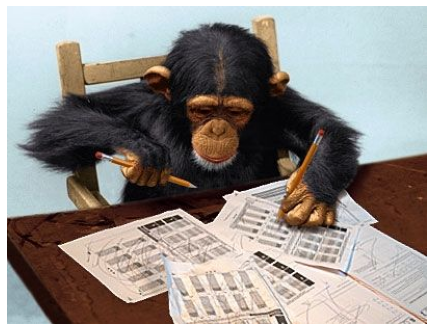

In [ ]:
show_image(read_image("./image.jpg"))

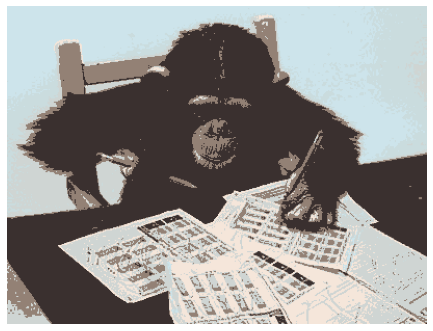

In [ ]:
image = read_image("./image.jpg")
result = clusterize_image(image, col=6, init="sample")
show_image(result)